In [1]:
import pandas as pd
import scipy.stats  as stats

df_collection = pd.read_csv('jacoco.csv', error_bad_lines=False)

import matplotlib.pyplot as plt

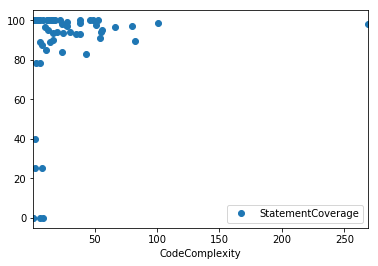

In [2]:
df_collection['StatementCoverage'] =  (df_collection['LINE_COVERED'] / (df_collection['LINE_COVERED'] + df_collection['LINE_MISSED'])) * 100

df_collection['BranchCoverage'] =  (df_collection['BRANCH_COVERED'] / (df_collection['BRANCH_COVERED'] + df_collection['BRANCH_MISSED'])) * 100

df_collection['CodeComplexity'] =  df_collection['COMPLEXITY_COVERED'] + df_collection['COMPLEXITY_MISSED'];

df_collection.plot(x='CodeComplexity', y='StatementCoverage', style='o')


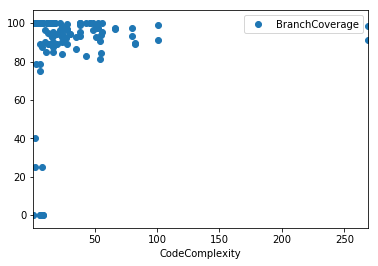

In [3]:
df_collection.plot(x='CodeComplexity', y='BranchCoverage', style='o')

plt.scatter(df_collection['CodeComplexity'], df_collection['StatementCoverage'])
plt.show()


In [4]:
df_collection.corr(method ='spearman')

df_collection[['CodeComplexity','StatementCoverage']].corr(method ='spearman')

df_clean = df_collection.dropna()
stats.spearmanr(df_clean['StatementCoverage'], df_clean['CodeComplexity'])

df_collection[['CodeComplexity','BranchCoverage']].corr(method ='spearman')

,CodeComplexity,BranchCoverage
CodeComplexity,1.000000,-0.344511
BranchCoverage,-0.344511,1.000000


In [5]:
df_clean = df_collection.dropna()
stats.spearmanr(df_clean['BranchCoverage'], df_clean['CodeComplexity'])

print('Statment Coverage '+str((df_collection.LINE_COVERED.sum()/(df_collection.LINE_MISSED.sum() + df_collection.LINE_COVERED.sum()))*100))

print('Branch Coverage '+str((df_collection.BRANCH_COVERED.sum()/(df_collection.BRANCH_MISSED.sum() + df_collection.BRANCH_COVERED.sum()))*100))


Statment Coverage 94.92230854605992
Branch Coverage 91.93154034229829
